## IS590PR - Spring 2018
## Assignment 5:  Analysis with multi-file or multi-table data using Pandas
### Data Set: Federal Elections Commission

http://classic.fec.gov/finance/disclosure/ftpdet.shtml files for download and the metadata.

Refer to examples in the Notebook I used in class as needed for starting points.  It is here: https://github.com/iSchool-590PR-2018Spring/in-class-examples/blob/master/week_7_FEC_pandas.ipynb

Also refer to Chapters 5 & 8 of the McKinney book for more examples. 

Note you may have to add support for the other data files in the FEC data set. Read their metadata pages to understand their contents.

# Instructions:
* As with previous assignments, first create a Fork of this repository, and immediately remove the "Participants" team from having access to yours. 
* Do not copy the whole lecture notebook into this one, because a lot of it does not pertain directly to the analysis in the assignment. But you may copy relevant segments from it to get started.
* **Choose and implement 4 of the analytical queries from the lists below. At least one must be from the "multi-file" list.**

* Add the code necessary to complete each one using Pandas DataFrames and/or Pandas Series. Clearly label each one with "Markdown" cells above them, and reasonable amounts of documentation between any intermediate results to show how you created the result. 
* Once you have things working, delete any wrong or experimental code that you may still have lingering, so that what remains shows just the complete start-to-finish process of loading the data and producing your analytical results.
* Save the notebook _with your outputs shown_.
* Commit & Push this notebook file before the due date so we can see your work in GitHub for grading & feedback.

# QUERIES TO CHOOSE FROM:

[General tips: Unless stated otherwise, you may use just a single 2-year data set to compute any of these. Nearly every query below will need the groupby() method. Any time a query description has 'per' or 'each', that means you need to use groupby on the column(s) that follow.]

## Single-file queries:
* List the top 30 professions (Occupations) for total donations.  This is an easy one to get started with.

* List the top 15 cities by total individual donations. Try creating a visual barchart with matplotlib -- it's not  hard. See examples from Week 6 or the McKinney book.

* Compute the total amount of donations received PER MONTH from all individuals together, listing in date order. [Tips: You'll have to correct the import parsing of TRANSACTION_DT in the itcont.txt file -- The original text files have dates like '13102017' for Oct. 13, 2017. ]

* List all individuals who donated a TOTAL of over $100,000 dollars. First clean up the data a bit by removing prefixes like "Mr.", "Mrs.", "Ms." and "Dr." from the names.  This will help the same people's donations get grouped together properly. Show name, city, state, employer, occupation, and total amount. [Tips: You must groupby name+city+state or by name+zipcode.  Also, you DO NOT need to merge or join the grouped result back to the original dataframe to make this work.  Instead, consult documentation on using the agg() method with a dictionary to indicate which function or operation should be applied to which column in the grouped result.]

* For donations directly to the presidential election only (from 2015-2016 files), determine total individual donations PER STATE.  Do not include the Senate and House candidates' fund raising.


## Multi-file queries (needing merge or join).  Do at least one of these:

Some of these are show corruption in action.

* List every INCUMBENT Senate candidate alphabetically, showing their Name, State, and Party affiliation. For each one, list the name of every Corporation or other PAC (i.e. non-individuals) that has "bought" them with huge donations (let's say over $50,000 dollars each). ["Incumbent" means they're already in office and are running for re-election. This is in the "CAND_ICI" column.]

* Find the donating moderates: Find out how many and what percentage of individual donors have contributed to BOTH  Democratic and Republican candidates in the same election cycle (same 2-year file set).

* Find individual people who donated over $2000 directly to a Senate or House candidate who's not even in their own state, and show the details (names & states of both people). [Tip: You'll need to compare the candidate's state to the individual donor's state after you get them joined.]

* Download all 3 individual donations files (itcont.txt) from 2014, 2016, and 2018. This is the ONLY query where the  concat() method should be used, to combine multiple years' data into a single DataFrame covering that whole range from 2013-2018. Then use that to compute an analysis of this:  Political activity is much higher for Presidential elections than in other years. Find out whether the level of donations to Senate and House campaigns goes up or down at that time compared to other years.
    

# Grading Rubric:
20% just for following all instructions properly. 
20% for each of 4 working queries (including at least 1 "Markdown" Cell describing the query and with the proper output data shown.)  

Note: for this assignment it is not required that you write functions, Docstrings, or unit tests. But you certainly can if you wish.


# Bonus Points:
If you make a reasonable effort to implement EXTRA queries, it will usually make up for points lost from any mistakes on other queries.  So it increases your odds of getting a high score on the assignment. Bonus points here do not compensate for a late penalty nor apply to other items in the gradebook.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Code reference from Week7 examples
my_dir = '/Users/rujutadawhkar/Desktop/MSIM2017/ProgramAnalytics/'
indiv_header_file = my_dir + 'indiv_header_file.csv'
indiv_file = my_dir + 'itcont.txt' # individual donations

ccl_header_file = my_dir + 'ccl_header_file.csv'
ccl_file = my_dir + 'ccl.txt'  # candidate-to-committee linkage

cn_header_file = my_dir + 'cn_header_file.csv'
cn_file = my_dir + 'cn.txt'  # Federal candidates

cm_header_file = my_dir + 'cm_header_file.csv'
cm_file = my_dir + 'cm.txt'  # Committees (funds and PACs)

pas_header_file = my_dir + 'pas2_header_file.csv'
pas_file = my_dir + 'itpas2.txt'  # Committees (funds and PACs)

In [5]:
def get_columns(header_file) -> list:
    with open(header_file, 'r') as hf:
        top_line = hf.readline().strip()
    return top_line.split(',')

In [6]:
cn_cols = get_columns(cn_header_file)
# Read the Candidates file data:
cn = pd.read_csv(cn_file, sep='|', index_col=0, names=cn_cols,
                dtype={'CAND_ZIP': str})
cn.head()

,CAND_NAME,CAND_PTY_AFFILIATION,CAND_ELECTION_YR,CAND_OFFICE_ST,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
CAND_ID,,,,,,,,,,,,,,
H0AK00097,"COX, JOHN R.",REP,2014,AK,H,0.0,C,N,C00525261,P.O. BOX 1092,NaN,ANCHOR POINT,AK,99556
H0AL02087,"ROBY, MARTHA",REP,2016,AL,H,2.0,I,C,C00462143,PO BOX 195,NaN,MONTGOMERY,AL,36101
H0AL02095,"JOHN, ROBERT E JR",IND,2016,AL,H,2.0,C,N,NaN,1465 W OVERBROOK RD,NaN,MILLBROOK,AL,36054
H0AL05049,"CRAMER, ROBERT E ""BUD"" JR",DEM,2008,AL,H,5.0,NaN,P,C00239038,PO BOX 2621,NaN,HUNTSVILLE,AL,35804
H0AL05163,"BROOKS, MO",REP,2016,AL,H,5.0,I,C,C00464149,7610 FOXFIRE DRIVE,NaN,HUNTSVILLE,AL,35802


In [7]:
# Read the Indiv file header:
indiv_cols = get_columns(indiv_header_file)
indiv_cols

# Read the Indiv file data:
dateparser = lambda x: pd.to_datetime(x, errors='coerce', format='%m%d%Y')

indiv = pd.read_csv(indiv_file, sep='|', index_col='SUB_ID', 
                    names=indiv_cols,
                    usecols=['NAME','CITY','STATE','ZIP_CODE',
                            'EMPLOYER','OCCUPATION',
                            'TRANSACTION_DT','TRANSACTION_AMT',
                            'CMTE_ID','ENTITY_TP','SUB_ID'],
                    dtype={'SUB_ID': str, 'ZIP_CODE': str, 'TRANSACTION_DT': str},
                    date_parser = dateparser,
                    parse_dates=['TRANSACTION_DT']
                   )
indiv.head()

,CMTE_ID,ENTITY_TP,NAME,CITY,STATE,ZIP_CODE,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
SUB_ID,,,,,,,,,,
4041320151241796098,C00004606,IND,"ARNOLD, ROBERT",MCPHERSON,KS,67460,SELF,OPTOMETRIST,2015-03-10,1000
4041320151241796099,C00004606,IND,"BICKLE, DON",HAYS,KS,67601,RETIRED,RETIRED,2015-03-30,1000
4041320151241796100,C00004606,IND,"ROSSMAN, RICHARD",OLATHE,KS,66051,CRAWFORD SALES COMPANY,BUSINESSMAN,2015-03-30,250
4041320151241796102,C00452383,IND,"LLEWELLYN, CHARLES",FREDERICK,MD,21704,NaN,NaN,2015-03-11,500
4041320151241796103,C00452383,IND,"TYNES, TIMOTHY MR.",VERO BEACH,FL,329600595,NaN,NaN,2015-03-02,250


In [8]:
# Read the Committee header:
cm_cols = get_columns(cm_header_file)
# Read the Committee file data:
cm = pd.read_csv(cm_file, sep='|', index_col=0, names=cm_cols)
cm.head()

,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
CMTE_ID,,,,,,,,,,,,,,
C00000059,HALLMARK CARDS PAC,ERIN BROWER,2501 MCGEE,MD#288,KANSAS CITY,MO,64108,U,Q,UNK,M,C,NaN,NaN
C00000422,AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION ...,"WALKER, KEVIN","25 MASSACHUSETTS AVE, NW",SUITE 600,WASHINGTON,DC,20001,B,Q,NaN,M,M,AMERICAN MEDICAL ASSOCIATION,NaN
C00000489,D R I V E POLITICAL FUND CHAPTER 886,TOM RITTER,3528 W RENO,NaN,OKLAHOMA CITY,OK,73107,U,N,NaN,Q,L,TEAMSTERS LOCAL UNION 886,NaN
C00000547,KANSAS MEDICAL SOCIETY POLITICAL ACTION COMMITTEE,"C. RICHARD BONEBRAKE, M.D.",623 SW 10TH AVE,NaN,TOPEKA,KS,66612,U,Q,UNK,Q,T,NaN,NaN
C00000638,INDIANA STATE MEDICAL ASSOCIATION POLITICAL AC...,"VIDYA KORA, M.D.","322 CANAL WALK, CANAL LEVEL",NaN,INDIANAPOLIS,IN,46202,U,Q,NaN,Q,M,NaN,NaN


## Single file Query Q1
### List the top 30 professions (Occupations) for total donations. This is an easy one to get started with.

In [9]:
#Grouping the data by Occupation and summing the TRANSACTION_AMT
indiv_occupation = indiv.groupby(['OCCUPATION'])['TRANSACTION_AMT'].sum()

#Selecting the largest 30 values from the indiv_occupation series
print("Top 30 professions (Occupations) for total donations")
indiv_occupation.nlargest(30)

Top 30 professions (Occupations) for total donations


OCCUPATION
RETIRED                    609034899
ATTORNEY                   229668964
PRESIDENT                  214630432
CEO                        200303539
CHAIRMAN                   179479173
NOT EMPLOYED               175860429
EXECUTIVE                  169880243
HOMEMAKER                  152949297
FOUNDER                    117131777
PHYSICIAN                  110994940
OWNER                       96646710
INVESTOR                    84317433
CONSULTANT                  67823521
PHILANTHROPIST              57103722
CHAIRMAN & CEO              52693148
PARTNER                     46737029
LAWYER                      37065612
REAL ESTATE                 36661951
FINANCE                     35945513
MANAGER                     32933139
ENGINEER                    32401216
PROFESSOR                   30981328
DIRECTOR                    27470175
PRESIDENT/CEO               26882023
CHIEF EXECUTIVE OFFICER     26502599
INVESTMENTS                 25479652
VICE PRESIDENT             

## Single file Query Q4
### List all individuals who donated a TOTAL of over 100,000 dollars. First clean up the data a bit by removing prefixes like "Mr.", "Mrs.", "Ms." and "Dr." from the names. This will help the same people's donations get grouped together properly. Show name, city, state, employer, occupation, and total amount. [Tips: You must groupby name+city+state or by name+zipcode. Also, you DO NOT need to merge or join the grouped result back to the original dataframe to make this work. Instead, consult documentation on using the agg() method with a dictionary to indicate which function or operation should be applied to which column in the grouped result.]

In [10]:
#Clean data and display it to see if it is replaced
indiv['NAME'] = indiv['NAME'].replace(('(MR|MRS|DR|MS)\.'), '',regex=True)
#indiv['NAME'] = indiv['NAME'].replace('MR.', '',regex=True)
#indiv['NAME'] = indiv['NAME'].replace('DR.', '',regex=True)
#indiv['NAME'] = indiv['NAME'].replace('MS.', '',regex=True)
indiv['NAME']

SUB_ID
4041320151241796098            ARNOLD, ROBERT
4041320151241796099               BICKLE, DON
4041320151241796100          ROSSMAN, RICHARD
4041320151241796102        LLEWELLYN, CHARLES
4041320151241796103           TYNES, TIMOTHY 
4041320151241796104         WIESTER, GEORGIA 
4041320151241796101          BIGBEE, PHYLLIS 
4041320151241796127           SADHWANI, ANAND
4041320151241796106       BEDNAREK, STEPHANIE
4041320151241796107           BRUNSON, RAEGAN
4041320151241796108           BUGYIK, PAUL L.
4041320151241796109         DEN HERDER, DAVID
4041320151241796110           DUNN, MATHEW P.
4041320151241796111             EBBAT, ROBERT
4041320151241796112             GABE, JESSICA
4041320151241796113               HAHN, MONTY
4041320151241796114            HEWITT, STEVEN
4041320151241796115           HOPKINS, VAN M.
4041320151241796117             JOHNSEN, BRET
4041320151241796118           JOHNSON, WESTON
4041320151241796119         JONES, MICHAEL D.
4041320151241796120        

In [11]:
#Code reference from Week7 examples
true_indivs = indiv[indiv['ENTITY_TP'] == 'IND']  # limit to ONLY real individuals
donations = true_indivs.groupby(['NAME','ZIP_CODE'],as_index=False).agg(
    {'CITY': 'first', 'STATE': 'first', 
     'EMPLOYER': 'first', 'OCCUPATION': 'first',
     'TRANSACTION_AMT': sum})

big_donations=donations[donations['TRANSACTION_AMT']>100000].reset_index(drop=True)
big_donations
#big_donations.reset_index()
#big_donations.reset_index(drop=True)
#big_donations

,NAME,ZIP_CODE,CITY,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT
0,"ABELE, CHRIS",532031116,MILWAUKEE,WI,COUNTY OF MILWAUKEE,EXECUTIVE,362859
1,"ABESSINIO, MARY F.",334325066,BOCA RATON,FL,RETIRED,RETIRED,130000
2,"ABESSINIO, ROCCO A.",334325066,BOCA RATON,FL,ROCH CAPITAL INC.,EXECUTIVE,130000
3,"ABOUSSIE, JOYCE ALEXIS",631241532,SAINT LOUIS,MO,ABOUSSIE & ASSOCIATES,CEO,144237
4,"ABRAHAM, DANIEL",334016122,WEST PALM BEACH,FL,CENTER FOR MIDDLE EAST PEACE,CHAIRMAN,3008100
5,"ABRAHAM, DANIEL",334016152,WEST PALM BEACH,FL,SDA ENTERPRISES,EXECUTIVE,250000
6,"ABRAHAM, DANIEL",334016161,WEST PALM BEACH,FL,SDA ENTERPRISES,EXECUTIVE,6002700
7,"ABRAHAM, DANNY S.",334016161,WEST PALM BEACH,FL,SLIM-FAST,FOUNDER,200000
8,"ABRAHAM, S DANIEL",334016161,WEST PALM BEACH,FL,HEALTH FOODS OF AMERICA,EXECUTIVE,144200
9,"ABRAHAM, S. DANIEL",334016122,WEST PALM BEACH,FL,"BEACH CAPITAL MANAGEMENT, LLC",INVESTOR,250000


## Q2 Single File Query
### List the top 15 cities by total individual donations. Try creating a visual barchart with matplotlib -- it's not hard. See examples from Week 6 or the McKinney book.

Top 15 cities by total individual donations

 CITY
NEW YORK         443200655
SAN FRANCISCO    206313045
CHICAGO          153782028
WASHINGTON       120542982
LAS VEGAS        118764628
LOS ANGELES      113994808
DALLAS            93965667
HOUSTON           91081145
ATLANTA           52647583
LITTLE ROCK       36850111
GREENWICH         35863388
SEATTLE           35079630
MIAMI             33960022
PHILADELPHIA      33699079
LAKE FOREST       32564650
Name: TRANSACTION_AMT, dtype: int64 



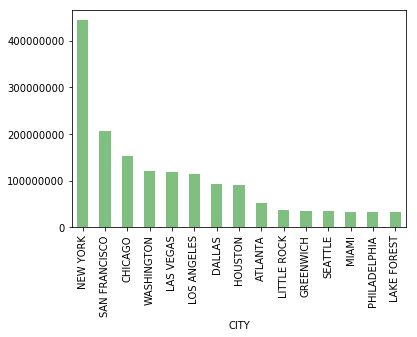

In [12]:
ax = plt.gca()
individuals = indiv[indiv['ENTITY_TP'] == 'IND']
indiv_city = individuals.groupby(['CITY'])['TRANSACTION_AMT'].sum()

#Selecting the largest 15 values from the indiv_occupation series
print("Top 15 cities by total individual donations")
print("\n",indiv_city.nlargest(15),"\n")
ax.get_yaxis().get_major_formatter().set_scientific(False)
indiv_city.nlargest(15).plot.bar(align='center', alpha=0.5,color='g')
plt.figure(figsize=(50,50))

## Multi Query: Q3
### Find individual people who donated over 2000 Dollars directly to a Senate or House candidate who's not even in their own state, and show the details (names & states of both people). [Tip: You'll need to compare the candidate's state to the individual donor's state after you get them joined.]

In [76]:
#Getting the transaction amount sum for every individual
indiv1 = indiv.groupby(['NAME','STATE','CITY','CMTE_ID'],as_index=False)['TRANSACTION_AMT'].sum()

#Filtering only amount above 2000
indiv_2000 = indiv1[indiv1['TRANSACTION_AMT']>2000]

#Joining 3 tables -> indiv to cm using CMTE_ID, cm to cn using CAND_ID
master_data = indiv_2000.join(cm,how='inner',on='CMTE_ID').join(cn,how='inner',on='CAND_ID')

#Filtering out data when the individual's city is different from the candidate's city and making sure that the candidate is not P-> President
master_data[(master_data['STATE'] != master_data['CAND_ST']) & (master_data['CAND_OFFICE'] != 'P')].reset_index(drop=True)

,NAME,STATE,CITY,CMTE_ID,TRANSACTION_AMT,CMTE_NM,TRES_NM,CMTE_ST1,CMTE_ST2,CMTE_CITY,...,CAND_OFFICE,CAND_OFFICE_DISTRICT,CAND_ICI,CAND_STATUS,CAND_PCC,CAND_ST1,CAND_ST2,CAND_CITY,CAND_ST,CAND_ZIP
0,"ASHER, DANIEL",IL,CHICAGO,C00466482,2700,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
1,"ASHER, DANIEL MR",IL,CHICAGO,C00466482,2700,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
2,"AUSTIN, EARL C",TX,SPRING,C00466482,2700,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
3,"AUSTIN, EARL C JR",TX,SPRING,C00466482,2700,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
4,"BODE, DENISE A MRS",MD,EASTON,C00466482,2700,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
5,"BOESCH, DOYCE A",DC,WASHINGTON,C00466482,2750,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
6,"CAMERON, RONALD M MR",AR,LITTLE ROCK,C00466482,2700,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
7,"CAMPBELL, CRAIG D MR",AR,LITTLE ROCK,C00466482,2500,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
8,"CHILTON, WARD W MR",NV,RENO,C00466482,5400,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415
9,"CLARK, ELLOINE M MRS",TX,DALLAS,C00466482,16525,FAMILIES FOR JAMES LANKFORD,TERRI MILLER,PO BOX 1639,NaN,BETHANY,...,S,0.0,I,C,C00466482,16121 WINDRUSH PL,NaN,EDMOND,OK,730139415


##  Q3 Single File Query
### Compute the total amount of donations received PER MONTH from all individuals together, listing in date order. [Tips: You'll have to correct the import parsing of TRANSACTION_DT in the itcont.txt file -- The original text files have dates like '13102017' for Oct. 13, 2017. ]

In [77]:
#Filter IND and then groupby month
individual = indiv[(indiv['ENTITY_TP'] == 'IND') & (indiv.TRANSACTION_DT.notnull())]
month = individual.groupby(individual.TRANSACTION_DT.dt.month)['TRANSACTION_AMT'].sum()

print("\nTotal amount of donations received PER MONTH\n")
month


Total amount of donations received PER MONTH



TRANSACTION_DT
1     192103734
2     305702952
3     418897206
4     365501341
5     363145974
6     571773009
7     352774503
8     576942641
9     686190186
10    740294936
11    343461304
12    294639997
Name: TRANSACTION_AMT, dtype: int64

## Q5 Single File Query
### For donations directly to the presidential election only (from 2015-2016 files), determine total individual donations PER STATE. Do not include the Senate and House candidates' fund raising.

In [78]:
# Filter data to exclude SENATE and House candidates
president = cn[(cn['CAND_OFFICE'] != 'S') & (cn['CAND_OFFICE'] != 'H')]
president

#Filter data to find Individuals
Indiv_Indi = indiv[indiv['ENTITY_TP'] == 'IND']
Indiv_Indi

cm_indi_HS = Indiv_Indi.join(cm,how='inner',on='CMTE_ID').join(president,how='inner',on='CAND_ID')
print("\nTotal individual donations PER STATE\n")
cm_indi_HS.groupby(['STATE'],as_index=False)['TRANSACTION_AMT'].sum()


Total individual donations PER STATE



,STATE,TRANSACTION_AMT
0,AA,40007
1,AE,158087
2,AK,1292369
3,AL,4455828
4,AP,103911
5,AR,3786113
6,AS,21515
7,AU,312
8,AZ,9306808
9,BC,713


## Q2 Multi File Query
### Find the donating moderates: Find out how many and what percentage of individual donors have contributed to BOTH Democratic and Republican candidates in the same election cycle (same 2-year file set).

In [84]:
#Filter data which is Democratic & Republican and Individuals and then join candidate master and Indiv tables
Democratic_Rep = cm[((cm['CMTE_PTY_AFFILIATION'] == 'DEM') | (cm['CMTE_PTY_AFFILIATION'] == 'REP')) & (cm.CMTE_PTY_AFFILIATION.notnull())]
Indiv_Indi = indiv[indiv['ENTITY_TP'] == 'IND']
cm_indi = Indiv_Indi.join(Democratic_Rep,how='inner',on='CMTE_ID')

#Make frame such that it has only Republican data and groupby using Name+Zip and count unique Rep+Dem values
rep1 = cm_indi[['NAME','ZIP_CODE','CMTE_PTY_AFFILIATION']]
rep_dem = rep1['NAME'].map(str) + rep1['ZIP_CODE']
rep_dem.reset_index(drop = True, inplace = True)
rep_dem1 = pd.DataFrame(rep_dem)
rep_dem1.rename(columns={0:'INDIV'}, inplace=True)
rep_dem2 = pd.DataFrame(rep_dem1)
total = rep_dem2.INDIV.nunique()

In [80]:
#Filter data such that it has only Rep values
REP = rep1[(rep1['CMTE_PTY_AFFILIATION'] == 'REP')]
REP1 = REP['NAME'].map(str) + REP['ZIP_CODE']
REP1.reset_index(drop = True, inplace = True)
REP2 = pd.DataFrame(REP1)
REP2.rename(columns={0:'INDIV'}, inplace=True)
REP3 = REP2.INDIV.unique()
REP3 = pd.DataFrame(REP3)
REP3.rename(columns={0:'INDIV'}, inplace=True)
REP3

,INDIV
0,"ARNOLD, ROBERT67460"
1,"BICKLE, DON67601"
2,"ROSSMAN, RICHARD66051"
3,"LAIR, MARY ALICE66720"
4,"MACHA, LAWRENCE66749"
5,"HERMES, DALTON66013"
6,"STAUFFER, JOHN66611"
7,"WOOD, RONALD G66701"
8,"BARTELS, JAMES 66062"
9,"COLEMAN, MYRA66103"


In [81]:
#Filter data such that it has only Dem values
DEM = rep1[(rep1['CMTE_PTY_AFFILIATION'] == 'DEM')]
DEM1 = DEM['NAME'].map(str) + DEM['ZIP_CODE']
DEM1.reset_index(drop = True, inplace = True)
DEM2 = pd.DataFrame(DEM1)
DEM2.rename(columns={0:'INDIV'}, inplace=True)
DEM3 = DEM2.INDIV.unique()
DEM3 = pd.DataFrame(DEM3)
DEM3.rename(columns={0:'INDIV'}, inplace=True)
DEM3

,INDIV
0,"ADAMS, GLORIA75631"
1,"GATLIN, JON MS75881"
2,"JOHNSON, JUDITH A75702"
3,"BLAYLOCK, IVAN75702"
4,"CALLOWAY, RAYFORD75702"
5,"DAVIS, ANDRIAN75701"
6,"DOUGHTERY, LAWRENCE75702"
7,"EDDING, DARYL JR.75702"
8,"JOHNSON, ROSHANDA75115"
9,"KRUEGER, NORMA NA 75765"


In [85]:
#Join both Dem and Rep to ind common values and then count those values
s1 = pd.merge(REP3, DEM3, how='inner', on=['INDIV'])
unique_indi = s1.INDIV.count()
percent_indi = (unique_indi/total)*100
print("Contributions to BOTH Democratic and Republican candidates")
print("\nTotal number of individual donors =",total)
print("\nTotal number of unique individual donors who have contributed to BOTH Democratic and Republican candidates =",unique_indi)
print("\nPercentage of individual donors have contributed to BOTH Democratic and Republican candidates =",percent_indi,)

Contributions to BOTH Democratic and Republican candidates

Total number of individual donors = 1900470

Total number of unique individual donors who have contributed to BOTH Democratic and Republican candidates = 9148

Percentage of individual donors have contributed to BOTH Democratic and Republican candidates = 0.48135461228
